In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import gudhi as gd
from ripser import Rips

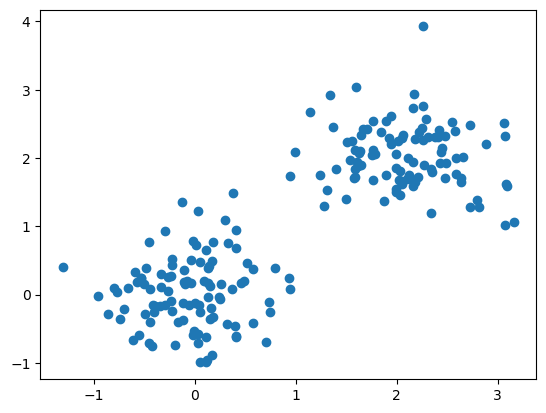

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate two sets of random points
cluster1 = np.random.normal(loc=[0, 0], scale=[0.5, 0.5], size=(100, 2))
cluster2 = np.random.normal(loc=[2, 2], scale=[0.5, 0.5], size=(100, 2))

# Combine the two sets of points into one point cloud
point_cloud = np.concatenate((cluster1, cluster2))

# Plot the point cloud
plt.scatter(point_cloud[:, 0], point_cloud[:, 1])
plt.show()


usetex mode requires TeX.


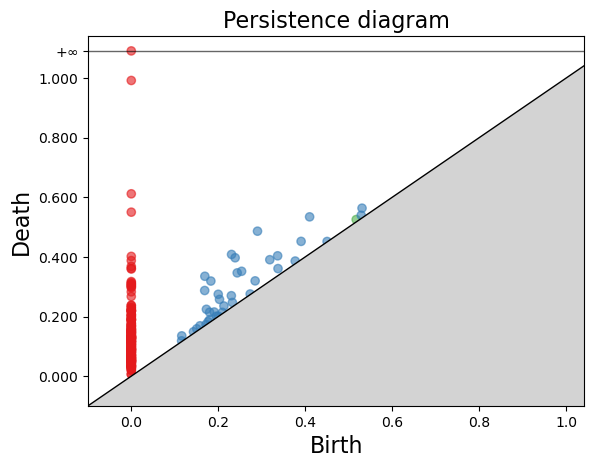

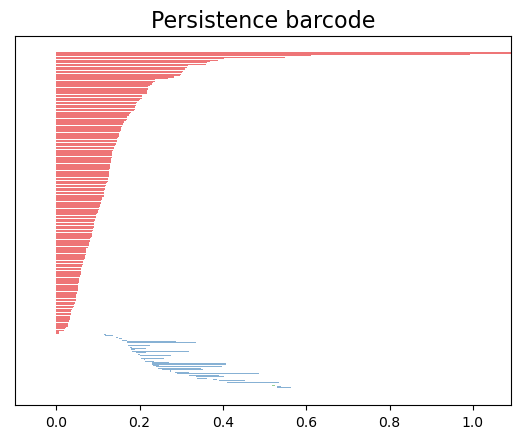

In [3]:
rips_complex = gd.RipsComplex(points=point_cloud, max_edge_length=2)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
persistence = simplex_tree.persistence()

gd.plot_persistence_diagram(persistence=persistence)
gd.plot_persistence_barcode(persistence=persistence)

In [4]:
rips_complex = gd.RipsComplex(points=point_cloud, max_edge_length=5)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
persistence = simplex_tree.persistence()

# gd.plot_persistence_diagram(persistence=persistence)
pairs = simplex_tree.persistence_pairs()
filtration = simplex_tree.get_filtration()


In [5]:
def merge_sublists_with_shared_items(data):
    merged = True
    while merged:
        merged = False
        for i in range(len(data)):
            for j in range(i + 1, len(data)):
                if set(data[i]).intersection(data[j]):
                    data[i] = list(set(data[i]).union(data[j]))
                    del data[j]
                    merged = True
                    break
            if merged:
                break
    return data

count = 0
results = []
for birth_value, death_value in [i[1] for i in persistence if i[0] >= 1]:
    filtration = simplex_tree.get_filtration()
    tolerance = 1e-6
    birth_simplices = []
    death_simplices = []

    for simplex, filtration_value in filtration:
        # print(filtration_value, birth_value)
        if abs(filtration_value - birth_value) < tolerance:
            # print(simplex)
            birth_simplices.append(simplex)
        elif abs(filtration_value - death_value) < tolerance or (death_value == np.Inf):
            death_simplices.append(simplex)
    # print(birth_simplices)

    # involved_points = set()

    # for birth_simplex in birth_simplices:
    #     for death_simplex in death_simplices:
    #         if set(birth_simplex).issubset(death_simplex):
    #             involved_points.update(birth_simplex)
    #             involved_points.update(death_simplex)
    
    # involved_points_b = (merge_sublists_with_shared_items(birth_simplices))
    involved_points_d = (merge_sublists_with_shared_items(death_simplices))

    # if len(involved_points_b) >= 0 : 
    #     print('b',count, birth_value, death_value, involved_points_b) 
    if len(involved_points_d) >= 0 : 
        print('d',count, birth_value, death_value, involved_points_d) 
        results.append(involved_points_d)
    count += 1
    
        

d 0 0.29031659256955056 0.4864392664900347 [[0, 81, 82, 20, 10, 43, 60]]
d 1 0.23063414928180528 0.408330238466017 [[51, 84, 85, 9, 31, 94, 47]]
d 2 0.1692309254666261 0.3351697959285642 [[100, 103, 176, 182, 183, 154, 188, 158, 159]]
d 3 0.23891509071207348 0.3972073858312368 [[48, 97, 82, 20, 72, 27, 74, 75]]
d 4 0.18304902051362565 0.31911756759158766 [[108, 109, 174, 145, 178]]
d 5 0.41019916019187747 0.534483250125896 [[194, 165, 135, 141, 111, 177, 113, 147, 179, 184]]
d 6 0.16885547314614607 0.2873788282548717 [[0, 48, 49, 54, 57, 93]]
d 7 0.2436343088809272 0.34650756583877695 [[105, 140, 175, 199]]
d 8 0.253785770933773 0.35185249735550594 [[50, 19, 98, 8, 76, 28]]
d 9 0.20001911431030298 0.2747307460488036 [[107, 172, 143, 114, 181]]
d 10 0.31860147396042016 0.3907229846146364 [[188, 163, 148, 149, 151, 136, 106, 124]]
d 11 0.33665558991490097 0.4037861853272691 [[67, 36, 15, 23, 88]]
d 12 0.3905995474209252 0.4522306340864365 [[3, 10, 78, 82, 59]]
d 13 0.20293707103938324 0.

In [6]:
a = []
for concern_points in results:
    for c in concern_points:
        # print(c)
        a.append(c)
        
print(merge_sublists_with_shared_items(a))

[[0, 3, 4, 5, 7, 8, 9, 10, 12, 14, 15, 16, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 33, 34, 36, 38, 40, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 57, 59, 60, 62, 63, 64, 65, 66, 67, 68, 71, 72, 74, 75, 76, 77, 78, 81, 82, 84, 85, 86, 87, 88, 91, 92, 93, 94, 95, 97, 98, 99], [129, 135, 136, 138, 141, 144, 147, 148, 149, 151, 154, 158, 159, 163, 164, 165, 166, 167, 169, 171, 176, 177, 179, 182, 183, 184, 186, 188, 194, 197, 100, 103, 106, 111, 113, 117, 124, 126], [108, 109, 174, 145, 178], [105, 140, 175, 199], [161, 196, 134, 137, 107, 172, 143, 112, 146, 114, 181, 118, 119, 152, 122, 155, 125], [162, 132, 150, 123, 190]]


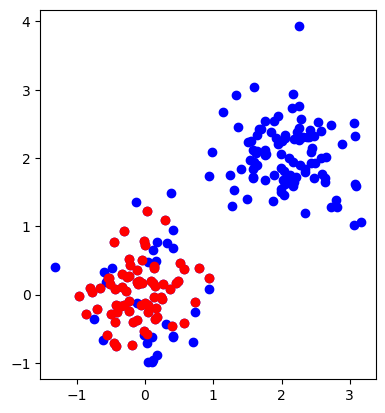

In [15]:
result = merge_sublists_with_shared_items(a)
concern_points = list(result[0])
fig, ax = plt.subplots()
# for i in range(len(centers)):
#     ax.scatter(x[:, i], y[:, i])
for idx, p in enumerate(point_cloud):
    ax.scatter(p[0], p[1], c='blue')
for idx, p in enumerate([point_cloud[i] for i in concern_points]):
    ax.scatter(p[0], p[1], c='red')
ax.set_aspect('equal')
plt.show()